<a href="https://colab.research.google.com/github/aakaashvp/mnist-classification/blob/main/Copy_of_Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [169]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [170]:
X_train.shape

(60000, 28, 28)

In [171]:
X_test.shape

(10000, 28, 28)

In [172]:
single_image= X_train[59999]

In [173]:
single_image.shape

(28, 28)

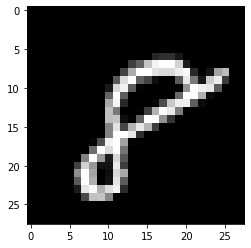

In [174]:
plt.imshow(single_image,cmap='gray')

In [175]:
y_train.shape

(60000,)

In [176]:
X_train.min()

0

In [177]:
X_train.max()

255

In [178]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [179]:
X_train_scaled.min()

0.0

In [180]:
X_train_scaled.max()

1.0

In [181]:
y_train[0]

5

In [182]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [183]:
type(y_train_onehot)

numpy.ndarray

In [184]:
y_train_onehot.shape

(60000, 10)

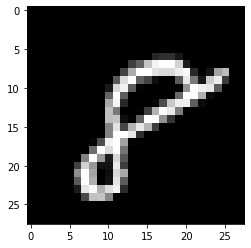

In [185]:
single_image = X_train[59999]
plt.imshow(single_image,cmap='gray')

In [186]:
y_train_onehot[59999]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [187]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [188]:
X_train_scaled.shape

(60000, 28, 28, 1)

In [189]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [190]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                346176    
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [191]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [194]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 31s 33ms/step - loss: 0.1950 - accuracy: 0.9433 - val_loss: 0.0743 - val_accuracy: 0.9760
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0517 - val_accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0507 - val_accuracy: 0.9825
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.0468 - val_accuracy: 0.9835
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0427 - val_accuracy: 0.9856


In [195]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

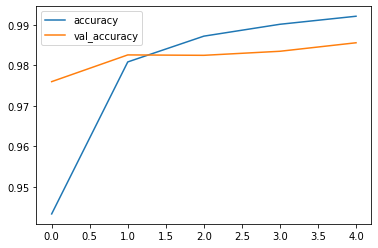

In [197]:
metrics[['accuracy','val_accuracy']].plot()

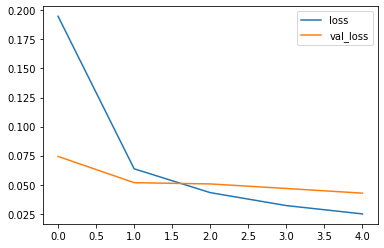

In [198]:
metrics[['loss','val_loss']].plot()

In [199]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [200]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 973    0    2    0    0    0    1    1    1    2]
 [   0 1127    2    1    1    0    2    0    2    0]
 [   0    4 1017    0    1    0    0    8    2    0]
 [   0    0    1  995    0    9    0    1    2    2]
 [   0    0    3    0  975    0    0    0    0    4]
 [   1    0    1    5    0  883    2    0    0    0]
 [   9    2    2    1    3    3  937    0    1    0]
 [   0    2    5    1    2    1    0 1011    0    6]
 [   6    0    5    3    1    1    1    1  950    6]
 [   1    0    0    2   12    3    0    3    0  988]]


In [201]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [395]:
img = image.load_img('eight.png')

In [396]:
type(img)

PIL.Image.Image

In [397]:
img = image.load_img('eight.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [398]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [399]:
print(x_single_prediction)

[5]


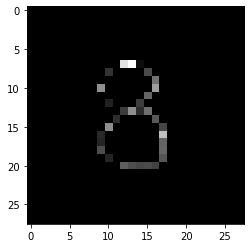

In [400]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [401]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [402]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [394]:
print(x_single_prediction)

[8]
